# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

![manifold](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_0011.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

/var/folders/24/h6r1lsxx1k1gcpbs79bpj3m80000gn/T/ipykernel_77952/1038051024.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])
/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [3]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = rand_proj.fit_transform(digits)

In [4]:
def min_max_scale(x):
  min_value, max_value = np.min(x, 0), np.max(x, 0)
  x = (x - min_value) / (max_value - min_value)
  return x

In [5]:
def plot_s_curve(s_curve, color, position, projection):
  s_curve = min_max_scale(s_curve)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [6]:
def plot_digits(digits, labels, position, projection):
  digits = min_max_scale(digits)
  if projection == '3d':
    ax = plt.subplot(position, projection=projection)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})
    ax.view_init(4, -72)
  elif projection == '2d':
    ax = plt.subplot(position)
    for i in range(digits.shape[0]):
      ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
              color=plt.cm.Set1(labels[i] / 10.), fontdict={'weight':'bold', 'size': 9})

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음

In [7]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='standard', random_state=0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='standard', random_state=0).fit_transform(digits)

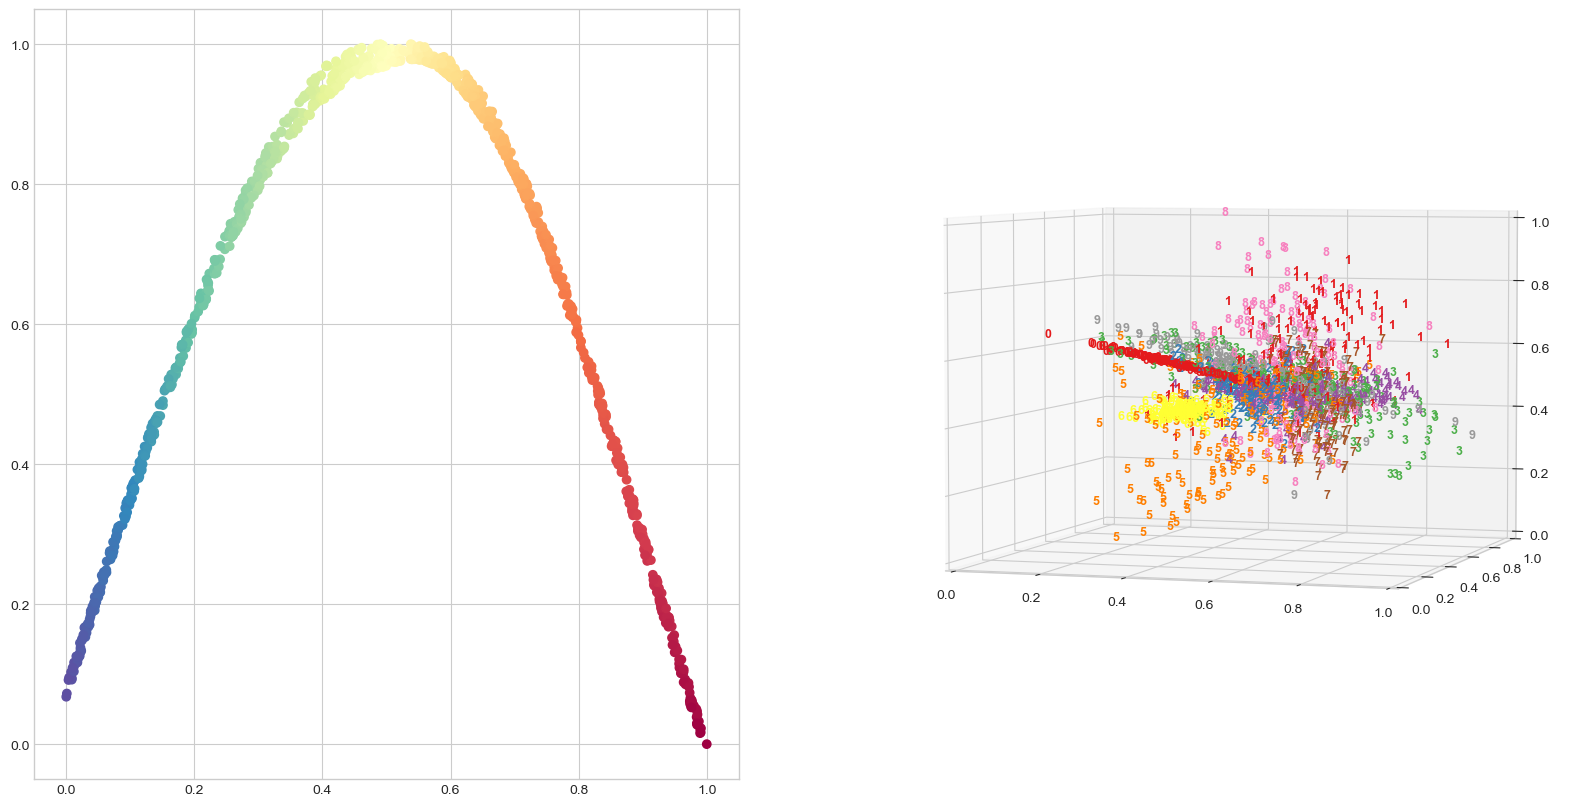

In [8]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [10]:
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='ltsa', random_state=0).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='ltsa', random_state=0).fit_transform(digits)

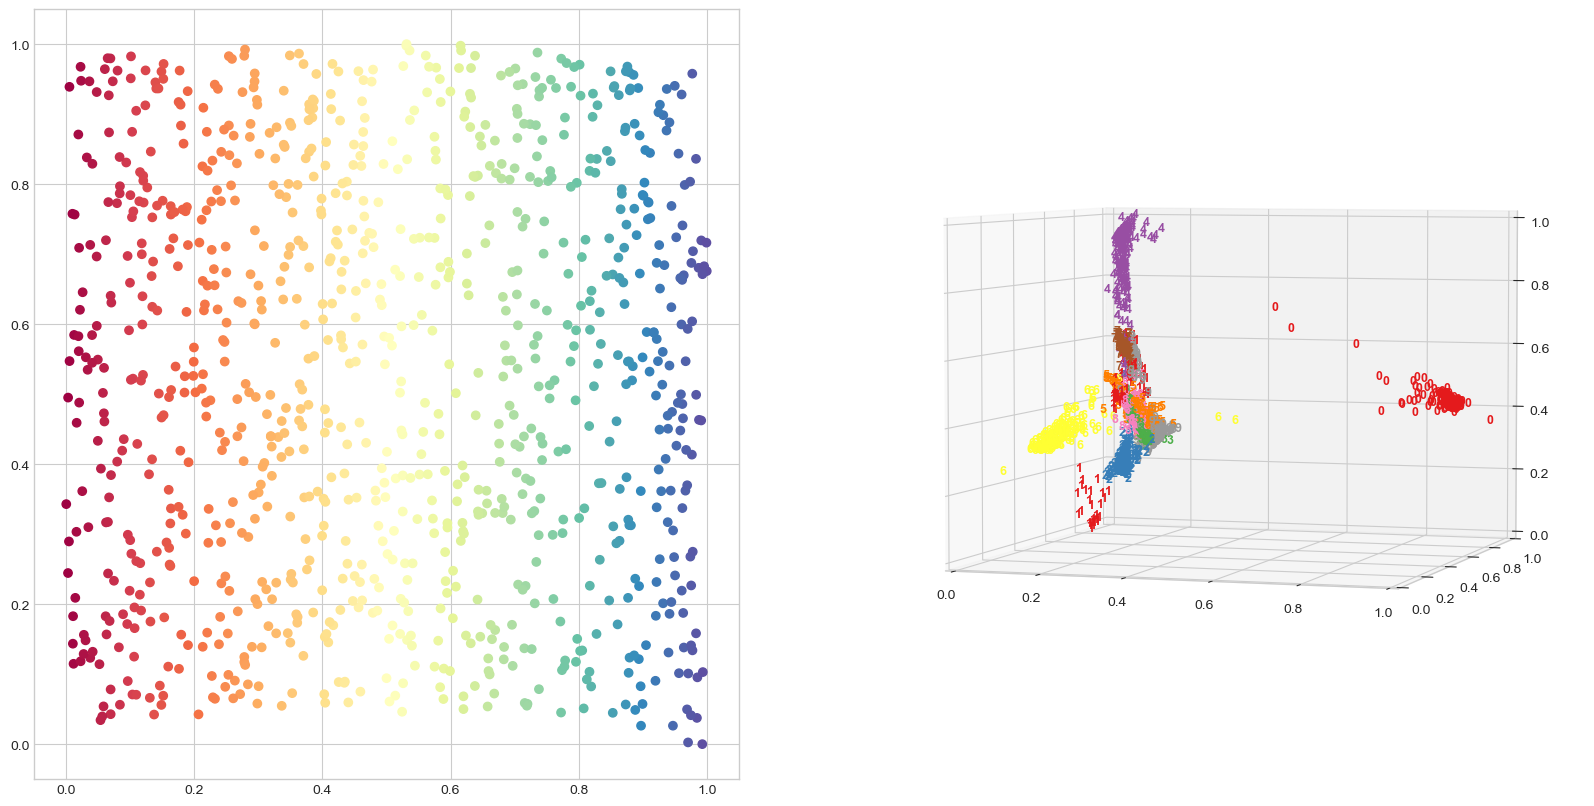

In [11]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_ltsa, color, 121, '2d')
plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [12]:
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='hessian', random_state=0).fit_transform(s_curve)
digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='hessian', random_state=0).fit_transform(digits)

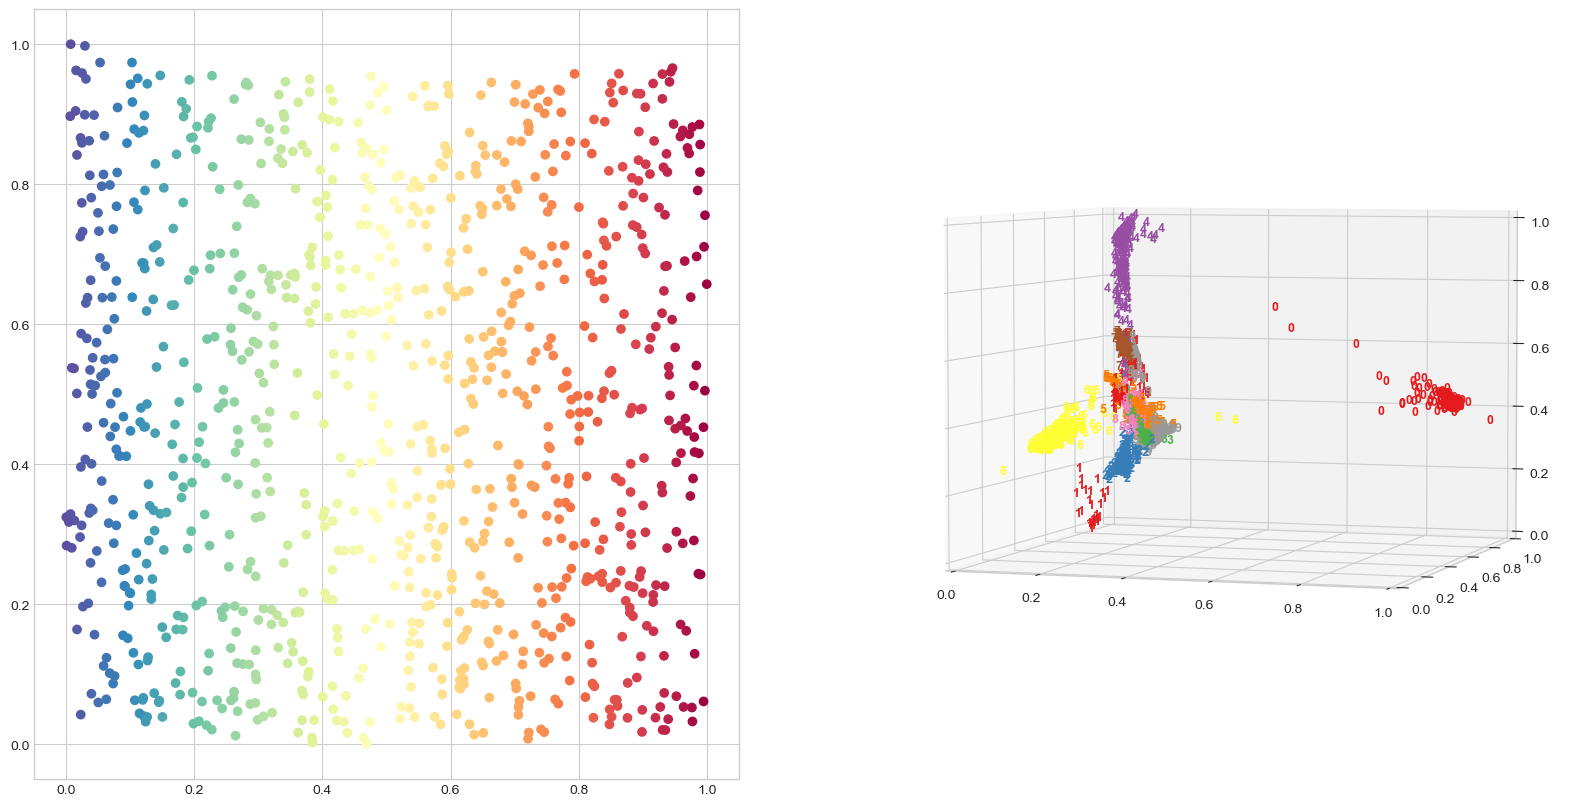

In [13]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_hlle, color, 121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [15]:
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='modified', random_state=0).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='modified', random_state=0).fit_transform(digits)

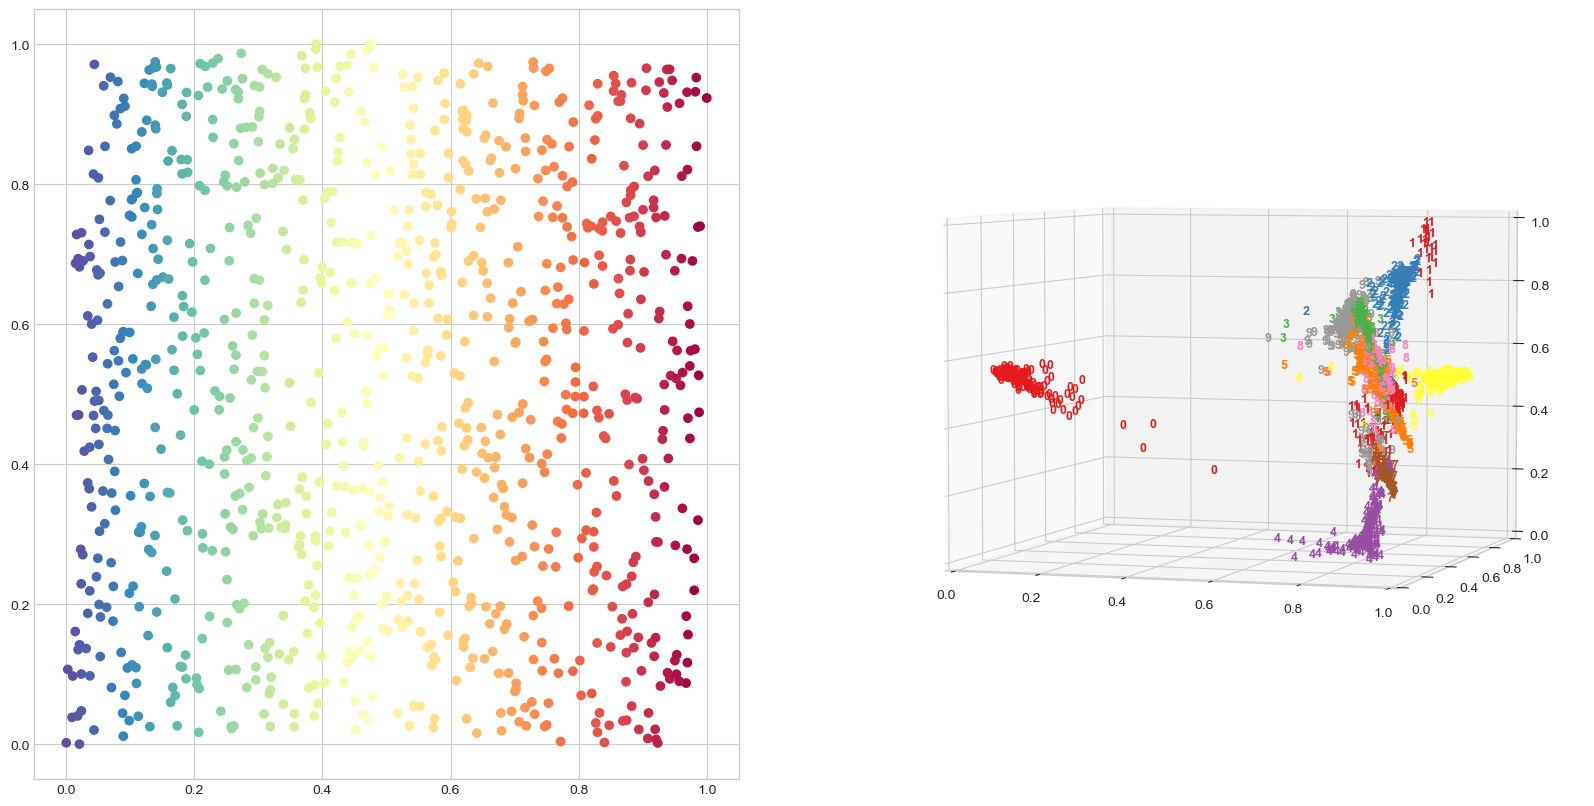

In [16]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mlle, color, 121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [20]:
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(digits)

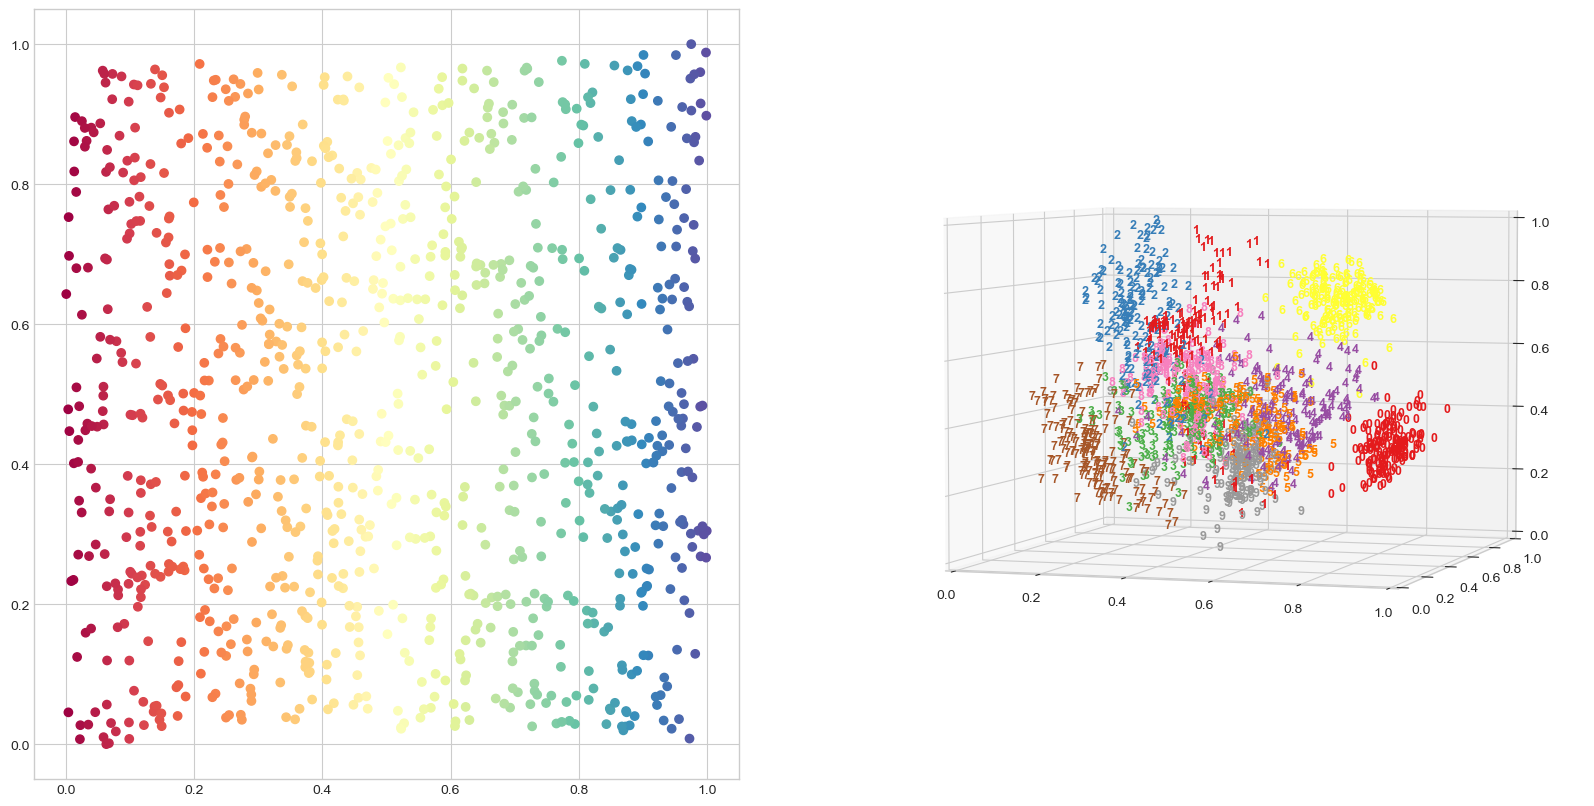

In [21]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [22]:
s_curve_mds = manifold.MDS(n_components=2, random_state=0).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(digits)

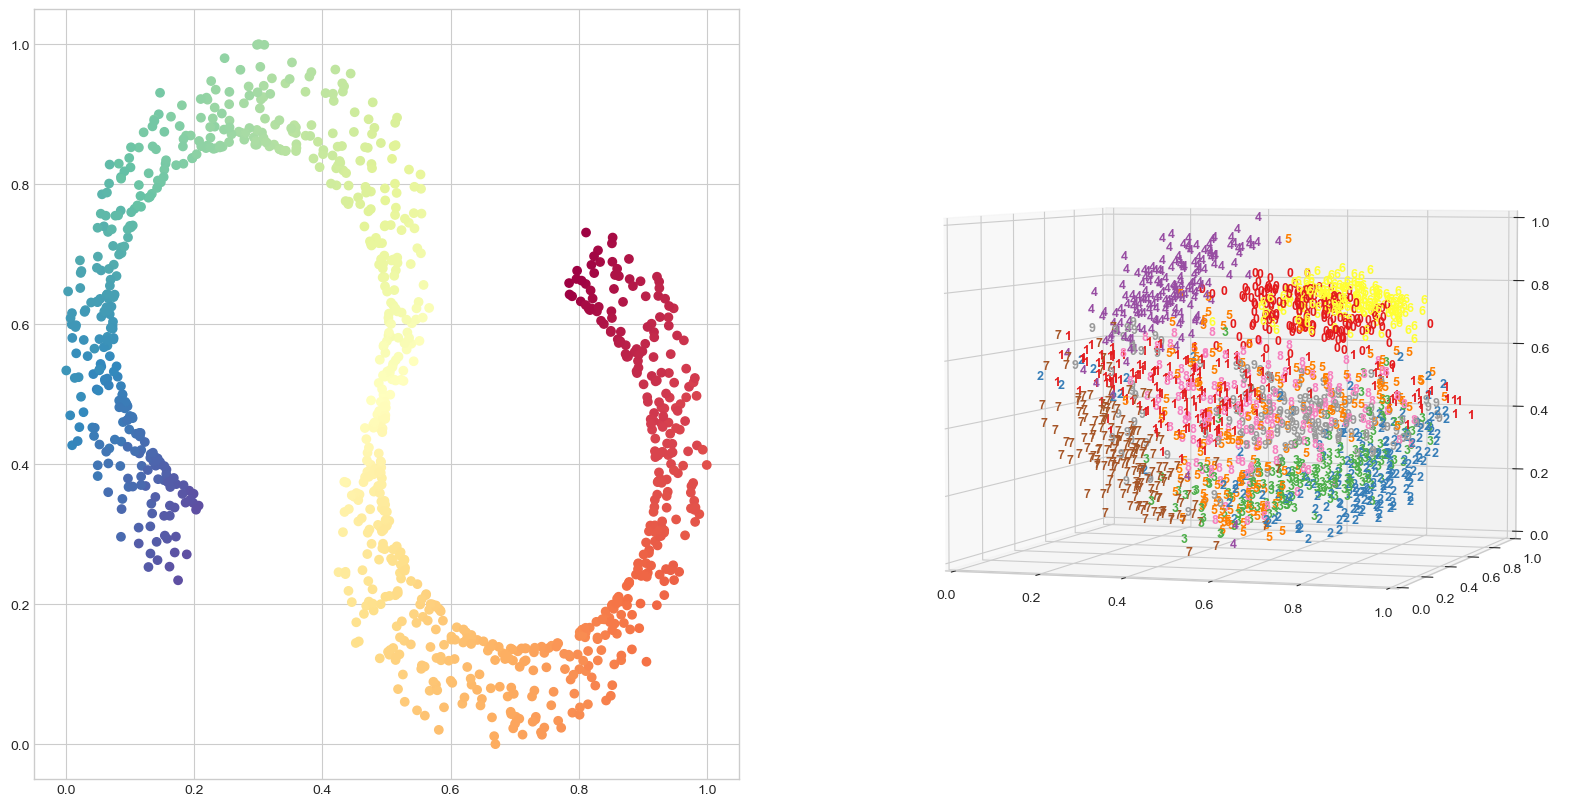

In [23]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [24]:
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
digits_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)

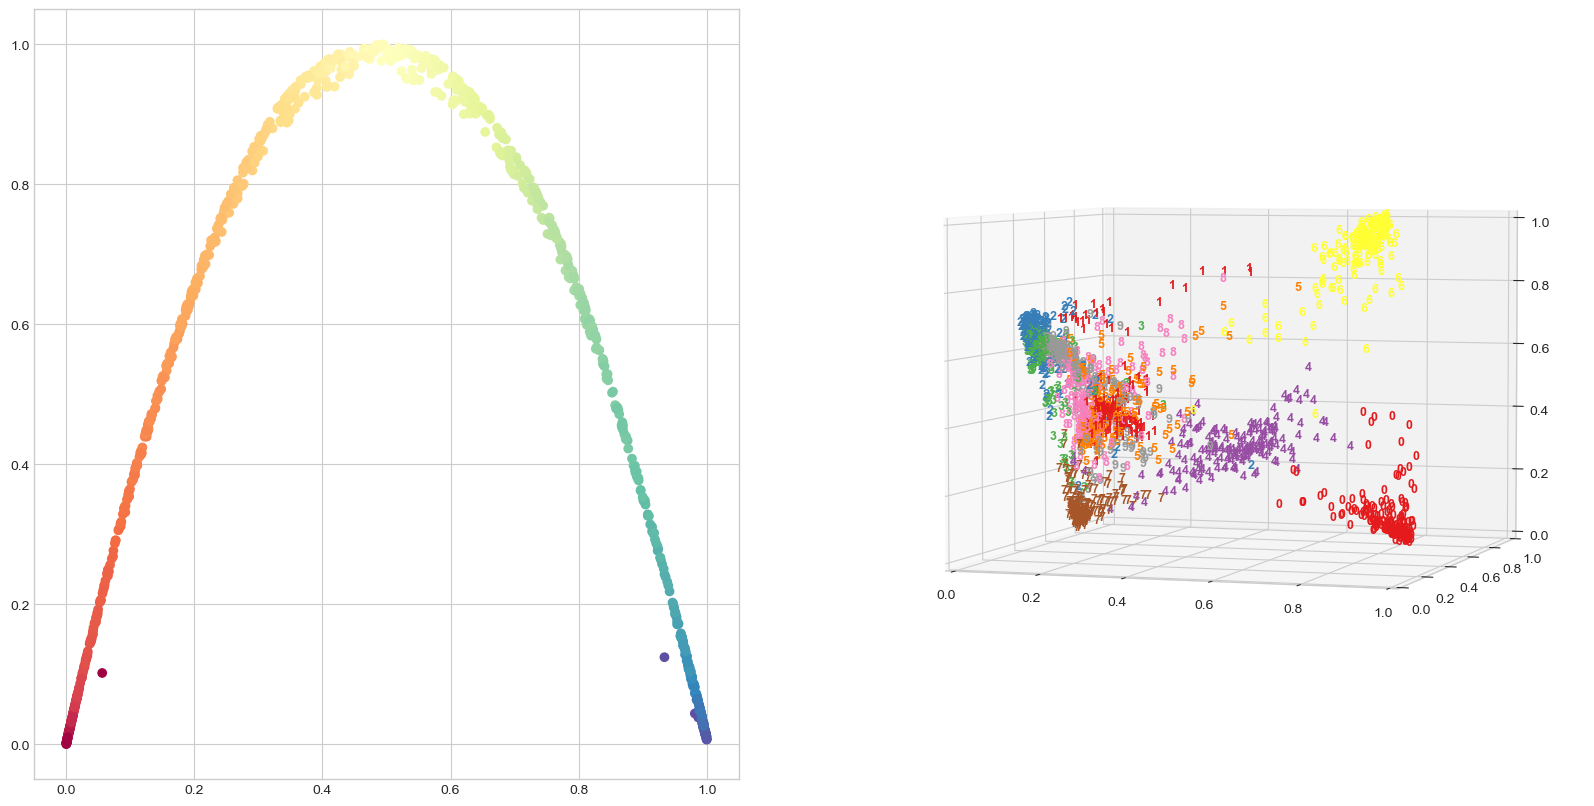

In [25]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [26]:
s_curve_tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(digits)

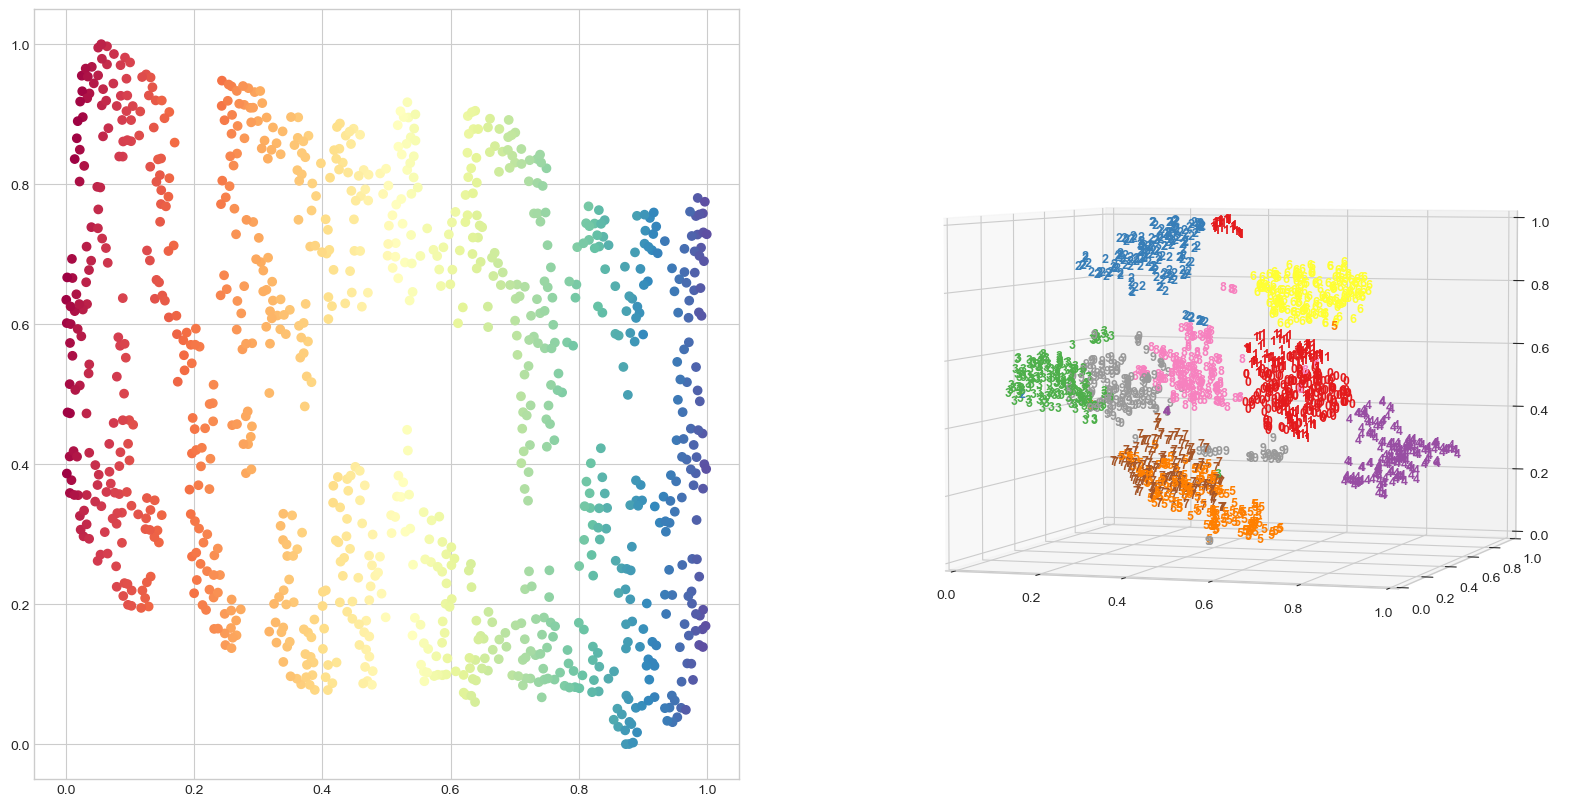

In [27]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, color, 121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [29]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [30]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [31]:
score = cross_val_score(
    estimator=knn,
    X=raw_digits, y=target,
cv=5 )
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [32]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM

In [33]:
score = cross_val_score(
    estimator=svm,
    X=raw_digits, y=target,
cv=5 )
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [34]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [36]:
score = cross_val_score(
    estimator=decision_tree,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.78333333, 0.71111111, 0.78551532, 0.82451253, 0.79108635])

In [37]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7791117301145156 (+/- 0.037114785999237114)


#### Random Forest

In [39]:
score = cross_val_score(
    estimator=random_forest,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.93055556, 0.90833333, 0.95264624, 0.96100279, 0.92479109])

In [40]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9354658000619004 (+/- 0.01908683259160566)


### 정제된 데이터를 사용할 때

#### KNN

In [41]:
score = cross_val_score(
    estimator=knn,
    X=digits_tsne, y=target,
cv=5 )
score

array([0.97222222, 0.98333333, 0.98050139, 0.99164345, 0.97771588])

In [42]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9810832559579078 (+/- 0.006430806379558995)


#### SVM

In [43]:
score = cross_val_score(
    estimator=svm,
    X=digits_tsne, y=target,
cv=5 )
score

array([0.95277778, 0.96388889, 0.98050139, 0.98885794, 0.97771588])

In [44]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9727483751160632 (+/- 0.012818881820083174)


#### Decision Tree

In [46]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.96111111, 0.90833333, 0.97493036, 0.97771588, 0.96657382])

In [47]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.95773290003095 (+/- 0.025396706031172406)


#### Random Forest

In [49]:
score = cross_val_score(
    estimator=random_forest,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.97777778, 0.94444444, 0.98885794, 0.98885794, 0.97771588])

In [50]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9755307954193748 (+/- 0.016318150796706236)
